<a href="https://colab.research.google.com/github/eiman-ops/Collaborative-Filtering-MovieLens-25M-/blob/main/Collaborative_Filtering_MovieLens_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 17.4MB/s 
     |████████████████████████████████| 194kB 35.4MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.collab import *
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root_dir = 'gdrive/My Drive/UnpackAi2/ML-25m/'
base_dir = root_dir + 'ML-25m'

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/My Drive/UnpackAi2/ML-25m/')
path.ls()

(#7) [Path('/content/drive/My Drive/UnpackAi2/ML-25m/tags.csv'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/movies.csv'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/genome-scores.csv'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/genome-tags.csv'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/links.csv'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/README.txt'),Path('/content/drive/My Drive/UnpackAi2/ML-25m/ratings.csv')]

In [ ]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
movies = pd.read_csv(path/'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,userId,title,rating
0,82945,Copycat (1995),3.0
1,2153,Sideways (2004),4.5
2,133038,Enemy of the State (1998),1.0
3,135767,"Shawshank Redemption, The (1994)",4.0
4,46264,"Big Empty, The (2003)",2.5
5,88432,Teen Wolf (1985),3.0
6,147420,Waking Ned Devine (a.k.a. Waking Ned) (1998),3.5
7,36855,E.T. the Extra-Terrestrial (1982),3.0
8,23891,One Flew Over the Cuckoo's Nest (1975),4.5
9,132922,You Can Count on Me (2000),4.0


In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.961733,1.006366,54:22
1,1.019276,1.005224,54:25
2,0.957726,0.976395,54:32
3,0.935747,0.929342,54:26
4,0.897359,0.895913,54:36


In [ ]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', "Schindler's List (1993)", 'Braveheart (1995)', 'Fight Club (1999)'], dtype=object)

In [ ]:
movie_bias = learn.model.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [ ]:
mean_ratings = ratings.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [ ]:
item0 = lambda o:o[0]
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.2604), 'Batman & Robin (1997)', 2.160149918962723),
 (tensor(-0.2188), 'Wild Wild West (1999)', 2.31967073274759),
 (tensor(-0.2053), 'Showgirls (1995)', 2.2478297395687483),
 (tensor(-0.1724), 'Godzilla (1998)', 2.373144567793439),
 (tensor(-0.1498), 'Flintstones, The (1994)', 2.4127870563674323),
 (tensor(-0.1413), 'Striptease (1996)', 2.403895524054024),
 (tensor(-0.1354), 'Scream 3 (2000)', 2.430953105968331),
 (tensor(-0.1354),
  'I Know What You Did Last Summer (1997)',
  2.4885263297519566),
 (tensor(-0.1208), 'Hollow Man (2000)', 2.53809586689555),
 (tensor(-0.1203), 'Judge Dredd (1995)', 2.555359804851606),
 (tensor(-0.1071), 'Daredevil (2003)', 2.5169466106778646),
 (tensor(-0.1033), 'Coneheads (1993)', 2.5814764286797027),
 (tensor(-0.0997),
  'Ace Ventura: When Nature Calls (1995)',
  2.6421677802524126),
 (tensor(-0.0832), 'Hulk (2003)', 2.6377331420373027),
 (tensor(-0.0821), 'Honey, I Shrunk the Kids (1989)', 2.718742232165051)]

In [ ]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(1.0226), 'Shawshank Redemption, The (1994)', 4.413576004516335),
 (tensor(0.8558), 'Usual Suspects, The (1995)', 4.284353213163313),
 (tensor(0.8460), "Schindler's List (1993)", 4.247579083279535),
 (tensor(0.8448), 'Godfather, The (1972)', 4.324336165187245),
 (tensor(0.8003), 'Silence of the Lambs, The (1991)', 4.151341616415071),
 (tensor(0.7992), 'Fight Club (1999)', 4.228310618821568),
 (tensor(0.7889), 'Pulp Fiction (1994)', 4.188912039361382),
 (tensor(0.7630), 'Matrix, The (1999)', 4.154099127610975),
 (tensor(0.7413), 'Godfather: Part II, The (1974)', 4.2617585117585115),
 (tensor(0.7303),
  "One Flew Over the Cuckoo's Nest (1975)",
  4.2186616007543405),
 (tensor(0.7302), 'Inception (2010)', 4.155508420105412),
 (tensor(0.7270), 'Dark Knight, The (2008)', 4.166538211421277),
 (tensor(0.7270), 'Forrest Gump (1994)', 4.048011436845787),
 (tensor(0.7184),
  'Star Wars: Episode IV - A New Hope (1977)',
  4.120188599618726),
 (tensor(0.7160),
  'Star Wars: Episode V - The

In [ ]:
movie_w = learn.model.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

In [ ]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [ ]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.9973), 'Independence Day (a.k.a. ID4) (1996)'),
 (tensor(1.8630), 'Twister (1996)'),
 (tensor(1.8493), 'Batman Forever (1995)'),
 (tensor(1.8358), 'Net, The (1995)'),
 (tensor(1.8346), 'Batman & Robin (1997)'),
 (tensor(1.7842), 'Wild Wild West (1999)'),
 (tensor(1.7445), 'Armageddon (1998)'),
 (tensor(1.7429), 'Congo (1995)'),
 (tensor(1.7085), 'Judge Dredd (1995)'),
 (tensor(1.6097), 'Flintstones, The (1994)')]

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-2.0331), 'Godfather, The (1972)'),
 (tensor(-2.0268),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'),
 (tensor(-2.0016), 'Pulp Fiction (1994)'),
 (tensor(-1.8952), 'Casablanca (1942)'),
 (tensor(-1.8555), 'Citizen Kane (1941)'),
 (tensor(-1.8330), 'Fargo (1996)'),
 (tensor(-1.7883), 'Godfather: Part II, The (1974)'),
 (tensor(-1.7751), 'Apocalypse Now (1979)'),
 (tensor(-1.7584), 'Clockwork Orange, A (1971)'),
 (tensor(-1.7455), 'Taxi Driver (1976)')]

In [ ]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3365), 'Lord of the Rings: The Return of the King, The (2003)'),
 (tensor(-1.2442), 'Lord of the Rings: The Two Towers, The (2002)'),
 (tensor(-1.2231), 'Inception (2010)'),
 (tensor(-1.2229), 'Shawshank Redemption, The (1994)'),
 (tensor(-1.2104), 'Dark Knight, The (2008)'),
 (tensor(-1.1862), 'Matrix, The (1999)'),
 (tensor(-1.1799), 'Forrest Gump (1994)'),
 (tensor(-1.1185), 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (tensor(-1.1123),
  'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
 (tensor(-1.1083), 'Back to the Future (1985)')]

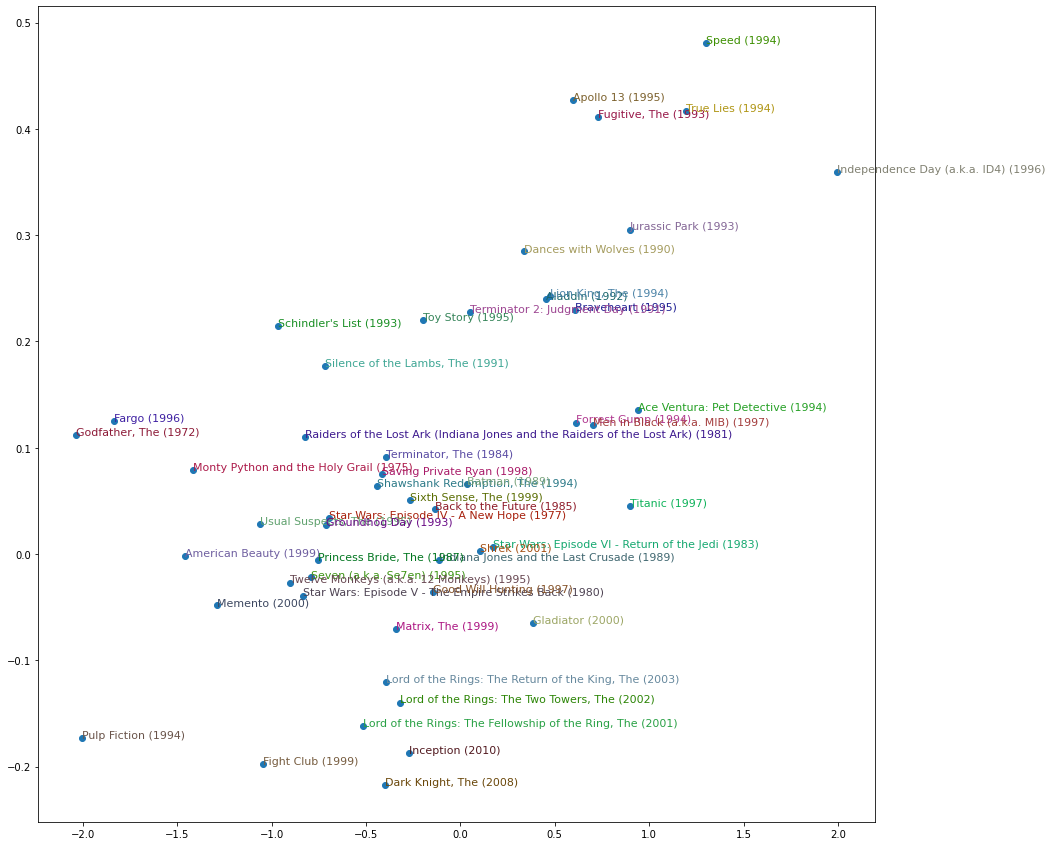

In [ ]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()


In [ ]:
learn.save('/content/drive/My Drive/UnpackAi2/ML-25m/')

Path('/content/drive/My Drive/UnpackAi2/ML-25m/.pth')

In [ ]:
learn.save

<bound method Learner.save of <fastai.learner.Learner object at 0x7f1e43688c18>>

In [ ]:
learn.export()

In [ ]:
path = Path('/content/drive/My Drive/Colab Notebooks/')
path.ls(file_exts='.pkl')

(#1) [Path('/content/drive/My Drive/Colab Notebooks/export.pkl')]